In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt

In [2]:
# 读取数据，划分训练集和测试集
path = 'ml-100k/'
train_set = pd.read_csv(path+'u1.base', names=['user id','item id','rating','timestamp'], delimiter='\t')
test_set = pd.read_csv(path+'u1.test', names=['user id','item id','rating','timestamp'], delimiter='\t')

train_df = train_set.copy()
train_df['user_item'] = train_df['user id']*10000 + train_df['item id']

train_df.head()

,user id,item id,rating,timestamp,user_item
0,1,1,5,874965758,10001
1,1,2,3,876893171,10002
2,1,3,4,878542960,10003
3,1,4,3,876893119,10004
4,1,5,3,889751712,10005


In [3]:
# 设置下标
user_id = train_set['user id'].unique()
item_id = train_set.set_index('user id')
rates = train_set.set_index(['user id','item id'])

In [4]:
# 初始化评价矩阵
evaluation = np.zeros((user_id.size,1682)) 
for uid in range(943):
    item = np.array(item_id.loc[(uid+1),'item id']) - 1
    rate = np.array(rates.loc[(uid+1),'rating'])
    evaluation[uid,item] = rate

In [5]:
df = pd.DataFrame(evaluation)
df

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


交替最小二乘法：

ALS通常用于基于矩阵分解的推荐系统中。例如：将用户（user）对商品（item）的评分矩阵分解为两个矩阵：一个用户因子矩阵X(n_user,K)，一个物品因子矩阵Y(n_item,K)。将矩阵分解后再合并，可以达到缺失值填充的效果，因此我们就可以基于这个新填充的矩阵来进行推荐。

以下公式取 $m = n\_user， n = n\_item$

分解的公式为：

$$R(n\_user,n\_item) = X(n\_user,K)Y(n\_item,K)^T$$

其中，K称为隐含特征数，一般取$K<<min(m,n)$。

为了使低维矩阵逼近原始评分矩阵R，需要最小化平方损失函数：

$$L(X,Y) = \sum(r_{ij} - x_i^Ty_j)^2$$

其中：
$x_i$表示用户i的偏好的隐含特征向量，维度为（1，K）；
$y_j$表示商品j包含的隐含特征向量，维度为（1，K）；
$r_ij$表示用户i对商品j的评分；
$x_i^Ty_j$表示用户i对商品j的评分的近似。

损失函数一般需要加入正则化项来避免过拟合，因此我们使用L2正则化：

$$ L(X,Y) = \sum(r_{ij} - x_i^Ty_j)^2 + \lambda(|x_i|^2 + |y_j|^2)$$

其中，$\lambda$是正则化项的系数。

交替最小二乘法的思想为：

- 先固定X，求损失函数对Y的每一行的偏导数，令偏导数为0，得到

$$x_i = (Y^TY + \lambda E)^{-1}Y^Tr_i$$

- 然后固定Y，求损失函数对X的每一行的偏导数，令偏导数为，得到

$$y_j = (X^TX + \lambda E)^{-1}X^Tr_j$$

- 最后计算$R_{iteration} = XY^T$，然后求出$L(X,Y)$

$$RMES = \sqrt{\frac{\sum{(R - R_{iteratrion})^2}}{N}}$$

重复以上步骤直到$L(X,Y)$收敛，画出$L(X,Y)$随迭代次数变化的曲线。

In [6]:
user = pd.read_csv(path+'u.user', names=['age', 'gender', 'occupation', 'zip'], delimiter='|')
user.head()

,age,gender,occupation,zip
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [7]:
user.loc[(user.gender=='M'),'gender']=1
user.loc[(user.gender=='F'),'gender']=0
occupation = user['occupation'].unique()
for i in range(len(occupation)):
    user.loc[(user.occupation==occupation[i]),'occupation'] = i
user.head()

,age,gender,occupation,zip
1,24,1,0,85711
2,53,0,1,94043
3,23,1,2,32067
4,24,1,0,43537
5,33,0,1,15213


In [8]:
cols = ['movie id','movie title','release date','video release date',
              'IMDb URL','unknown','Action','Adventure','Animation',
              'Children\'s','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
              'Thriller','War','Western']
items = pd.read_csv(path+'u.item', names=cols, delimiter='|')
items['video release date'] = items['release date']
items['movie title'], items['release date'] = items['movie title'].str.split(' \(',1).str
items['release date'] = items['release date'].str.rstrip(')')
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
items = items.drop(['movie title','release date','video release date','IMDb URL'], axis=1)
items.head()

,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [10]:
# 定义损失函数
def compute_loss(R, X, Y, penalty):
    R = np.matrix(R) # m*n
    X = np.matrix(X) # m*k
    Y = np.matrix(Y) # n*k
    loss = np.power((R - X.dot(Y.T)),2)
    reg = penalty*(np.power(X,2).dot(np.power(Y.T,2)))
    loss = loss + reg
    return loss.mean()

In [11]:
def compute_XY(R, X, Y, penalty, num_iters):
    loss = np.zeros((num_iters,1))
    for i in range(num_iters):
        X = np.linalg.inv((Y.T.dot(Y) + penalty*np.identity(K))).dot(Y.T).dot(R.T).T
        Y = np.linalg.inv((X.T.dot(X) + penalty*np.identity(K))).dot(X.T).dot(R).T
        loss[i] = compute_loss(R,X,Y,penalty)
#     loss[num_iters] = compute_loss(R,X,Y,penalty)
    R = X.dot(Y.T)
    return loss, R

In [12]:
# 定义惩罚参数
penalty = 0.1

In [13]:
# 定义隐含特征量K
K = 10

In [14]:
# 初始化用户因子矩阵P和物品因子矩阵Q
user = np.random.rand(evaluation.shape[0],K)
item = np.random.rand(evaluation.shape[1],K)
user_df = pd.DataFrame(user)
item_df = pd.DataFrame(item)

In [15]:
user_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.977148,0.593929,0.142545,0.902022,0.215580,0.484845,0.521310,0.707321,0.829414,0.762716
1,0.954374,0.431000,0.324880,0.991295,0.279060,0.571175,0.544414,0.669176,0.684381,0.119773
2,0.310261,0.958082,0.910815,0.894604,0.670407,0.264504,0.463295,0.871418,0.924867,0.115874
3,0.758313,0.406991,0.005091,0.051770,0.458862,0.594689,0.187771,0.113054,0.191435,0.104363
4,0.947232,0.690121,0.465158,0.972773,0.461753,0.488367,0.006053,0.216813,0.548751,0.788948


In [16]:
item_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.025236,0.636909,0.183258,0.642335,0.755506,0.169986,0.065814,0.250233,0.330268,0.529151
1,0.104714,0.075391,0.452724,0.610339,0.573581,0.600479,0.809627,0.067044,0.594312,0.765979
2,0.282518,0.541765,0.674370,0.249616,0.706268,0.452550,0.813888,0.581853,0.937204,0.393598
3,0.088081,0.525284,0.778761,0.114772,0.592214,0.470416,0.292977,0.644539,0.019739,0.705769
4,0.365543,0.781610,0.329811,0.571038,0.324360,0.485919,0.441392,0.606660,0.660369,0.936145


In [17]:
compute_loss(evaluation, user, item, penalty)

6.870335800342345

In [24]:
num_iters = 20
J_history, eval_matrix = compute_XY(evaluation, user, item, penalty, num_iters)

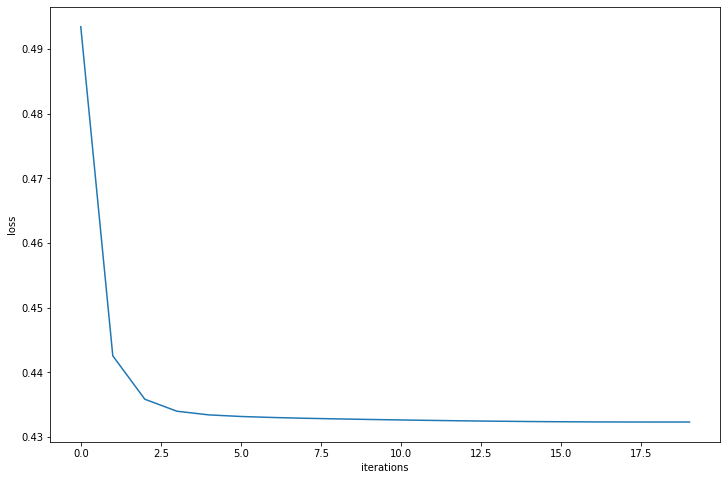

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(np.arange(num_iters), J_history)
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
plt.show()

In [27]:
df = pd.DataFrame(eval_matrix)
df = df.round()
df[df<=0] = 0
df[df>5] = 5
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,3.0,1.0,1.0,2.0,0.0,0.0,3.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
